In [1]:
%matplotlib inline

import os
import sys

PACKAGE_PARENT = '..'
sys.path.append(PACKAGE_PARENT)

import json
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

from gaminet import GAMINetClassifier
from gaminet import GAMINetRegressor
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_trajectory
from gaminet.utils import plot_regularization

In [40]:
from dataset import *
random_state = 0
get_metric = roc_auc_score
train_x, test_x, train_y, test_y, task_type, meta_info = get_credit_default(random_state)

## Compare with EBM

In [5]:
from interpret.glassbox import ExplainableBoostingClassifier

clf = ExplainableBoostingClassifier(interactions=10, feature_names=list(meta_info.keys())[:-1])
clf.fit(train_x, train_y)

pred_train = clf.predict_proba(train_x)[:, 1]
pred_test = clf.predict_proba(test_x)[:, 1]
ebm_stat = np.hstack([np.round(get_metric(train_y, pred_train),5),
                      np.round(get_metric(test_y, pred_test),5)])
print(ebm_stat)

[0.78981 0.7766 ]


In [6]:
from ebm_module.expapi import EBMExplainer
exp = EBMExplainer(clf)
exp.fit(train_x)

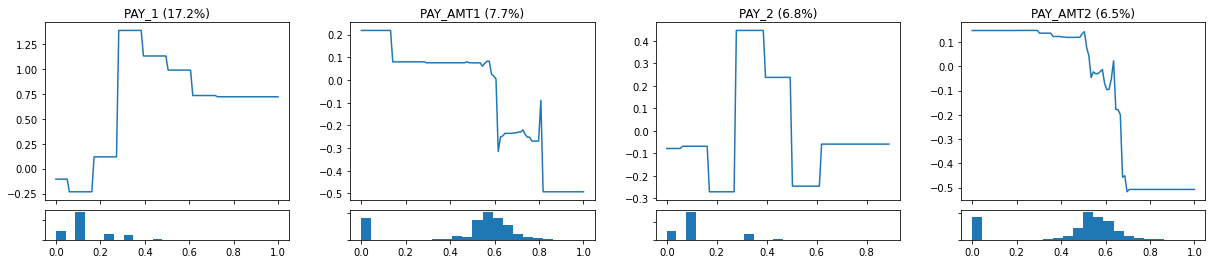

In [7]:
exp.show_global_explain(main_effect_num=4, interaction_num=0)

In [21]:
model = GAMINetClassifier(interact_num=10,
                          meta_info=meta_info,
                          subnet_size_main_effect=(20, ),
                          subnet_size_interaction=(20, 20), 
                          max_epochs=(1000, 1000, 1000),
                          learning_rates=(0.001, 0.001, 0.0001),
                          early_stop_thres=("auto", "auto", "auto"),
                          batch_size=1000,
                          warm_start=True,
                          reg_clarity=0.1,
                          reg_mono=0.5,
                          verbose=True,
                          mono_increasing_list=(0, ),
                          random_state=random_state)
model.fit(train_x, train_y)

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###############Run Warm Initialization for Main Effect###############
####################Stage 1: Main Effect Training####################


Epoch:    1, train loss: 0.44755, validation loss: 0.44491: 100%|██████████| 20/20 [00:00<00:00, 60.07it/s]                        
Epoch:    2, train loss: 0.44380, validation loss: 0.44731: 100%|██████████| 20/20 [00:00<00:00, 85.20it/s]                        
Epoch:    3, train loss: 0.44297, validation loss: 0.44526: 100%|██████████| 20/20 [00:00<00:00, 86.43it/s]                        
Epoch:    4, train loss: 0.44139, validation loss: 0.44332: 100%|██████████| 20/20 [00:00<00:00, 85.43it/s]                        
Epoch:    5, train loss: 0.44039, validation loss: 0.44314: 100%|██████████| 20/20 [00:00<00:00, 85.47it/s]                        
Epoch:    6, train loss: 0.43982, validation loss: 0.44321: 100%|██████████| 20/20 [00:00<00:00, 86.58it/s]                        
Epoch:    7, train loss: 0.43979, validation loss: 0.44258: 100%|██████████| 20/20 [00:00<00:00, 86.28it/s]                        
Epoch:    8, train loss: 0.43933, validation loss: 0.44294: 100%|██████████|

Main Effect Training Stop at Epoch: 39, train loss: 0.43665, validation loss: 0.44113
###############Run Warm Initialization for Interaction###############
####################Stage 2: Interaction Training####################


Epoch:    1, train loss: 0.43537, validation loss: 0.43810: 100%|██████████| 20/20 [00:00<00:00, 23.99it/s]                        
Epoch:    2, train loss: 0.43497, validation loss: 0.43801: 100%|██████████| 20/20 [00:00<00:00, 27.02it/s]                        
Epoch:    3, train loss: 0.43376, validation loss: 0.43655: 100%|██████████| 20/20 [00:00<00:00, 27.29it/s]                        
Epoch:    4, train loss: 0.43312, validation loss: 0.43695: 100%|██████████| 20/20 [00:00<00:00, 27.18it/s]                        
Epoch:    5, train loss: 0.43306, validation loss: 0.43652: 100%|██████████| 20/20 [00:00<00:00, 27.37it/s]                        
Epoch:    6, train loss: 0.43268, validation loss: 0.43629: 100%|██████████| 20/20 [00:00<00:00, 27.66it/s]                        
Epoch:    7, train loss: 0.43257, validation loss: 0.43770: 100%|██████████| 20/20 [00:00<00:00, 27.71it/s]                        
Epoch:    8, train loss: 0.43286, validation loss: 0.43640: 100%|██████████|

Interaction Training Stop at Epoch: 41, train loss: 0.43304, validation loss: 0.43700
#########################Stage 3: Fine Tuning#########################


Epoch:    1, train loss: 0.43374, validation loss: 0.43682: 100%|██████████| 20/20 [00:00<00:00, 27.38it/s]                        
Epoch:    2, train loss: 0.43353, validation loss: 0.43689: 100%|██████████| 20/20 [00:00<00:00, 27.37it/s]                        
Epoch:    3, train loss: 0.43352, validation loss: 0.43688: 100%|██████████| 20/20 [00:00<00:00, 27.49it/s]                        
Epoch:    4, train loss: 0.43357, validation loss: 0.43690: 100%|██████████| 20/20 [00:00<00:00, 27.49it/s]                        
Epoch:    5, train loss: 0.43347, validation loss: 0.43693: 100%|██████████| 20/20 [00:00<00:00, 27.26it/s]                        
Epoch:    6, train loss: 0.43357, validation loss: 0.43700: 100%|██████████| 20/20 [00:00<00:00, 27.05it/s]                        
Epoch:    7, train loss: 0.43350, validation loss: 0.43692: 100%|██████████| 20/20 [00:00<00:00, 27.87it/s]                        
Epoch:    8, train loss: 0.43342, validation loss: 0.43680: 100%|██████████|

Fine Tuning Stop at Epoch: 19, train loss: 0.43343, validation loss: 0.43692


GAMINetClassifier(batch_size=1000,
                  meta_info={'BILL_AMT1': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT2': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT3': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT4': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT5': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT6': {'s...
                             'PAY_AMT2': {'scaler': MinMaxScaler(),
                                          'type': 'continuous'},
                             'PAY_AMT3': {'scaler': MinMaxScaler(),
                                        

In [22]:
model.time_cost_

[('fit_interaction', 31.18),
 ('fine_tune_all', 13.9),
 ('fit_main_effect', 9.28),
 ('warm_start_main_effect', 4.66),
 ('warm_start_interaction', 3.71),
 ('add_interaction', 0.34),
 ('get_interaction_list', 0.29),
 ('prune_interaction', 0.2),
 ('prune_main_effect', 0.16)]

In [23]:
pred_train = model.predict_proba(train_x)[:, 1]
pred_test = model.predict_proba(test_x)[:, 1]
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train.ravel()),5),
                          np.round(get_metric(test_y, pred_test.ravel()),5)])
print(gaminet_stat)

[0.77445 0.76839]


In [24]:
gaminet_stat = np.hstack([np.round(np.mean(train_y.ravel() == (pred_train > 0.5).ravel()),5),
                          np.round(np.mean(test_y.ravel() == (pred_test > 0.5).ravel()),5)])
print(gaminet_stat)

[0.81779 0.82583]


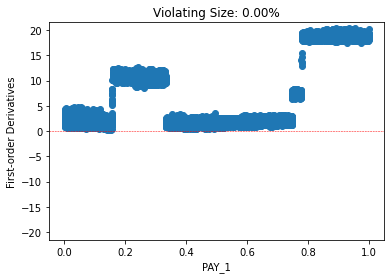

In [25]:
for i in model.mono_increasing_list + model.mono_decreasing_list:
    model.partial_derivatives(i)

## Visualization

### Training details

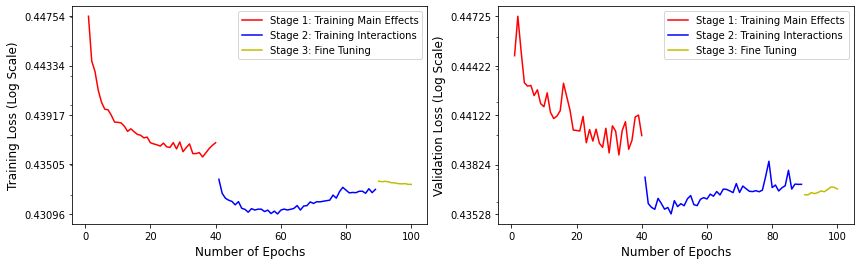

In [13]:
model.show_loss_trajectory()

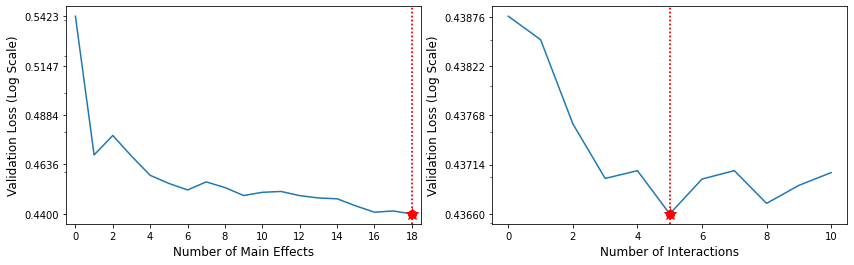

In [14]:
model.show_regularization_path()

### Global explaination

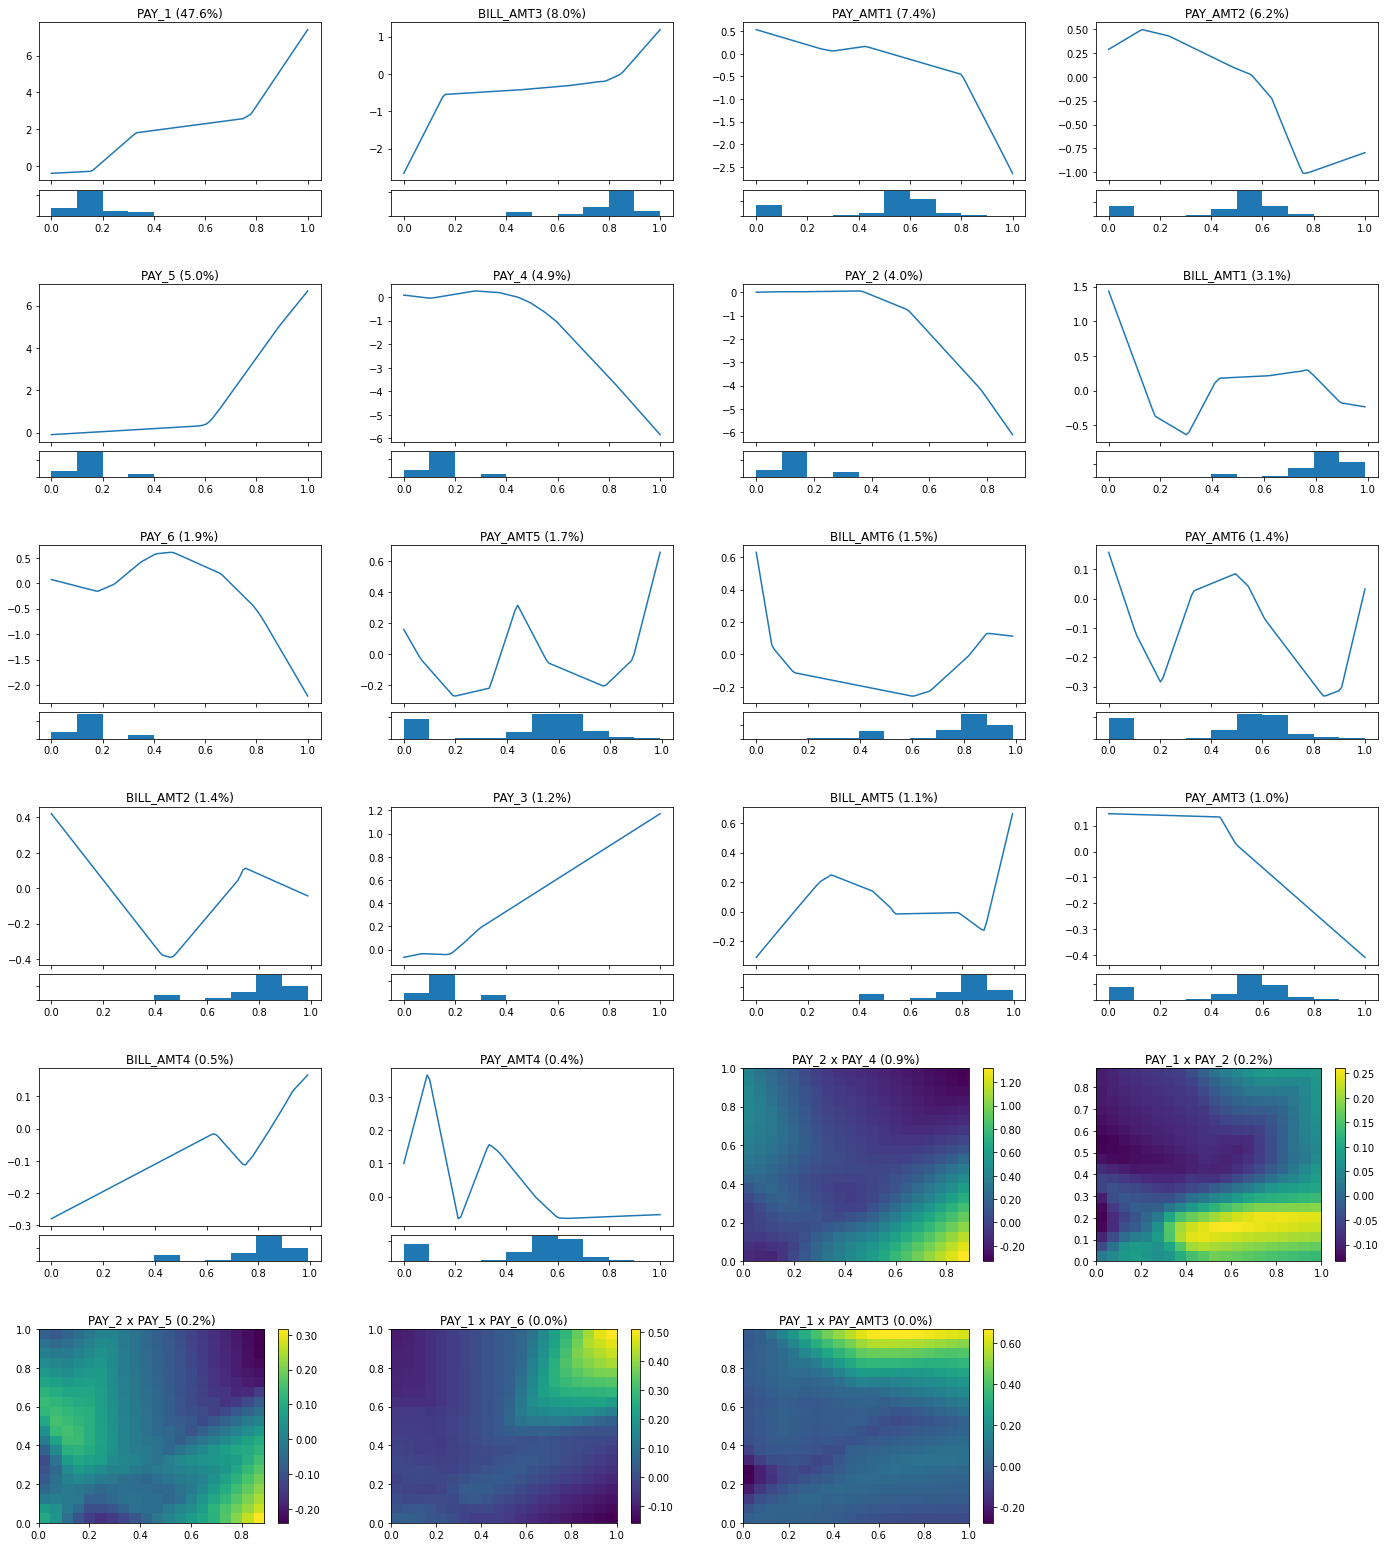

In [15]:
# show all effects 
model.show_global_explain()

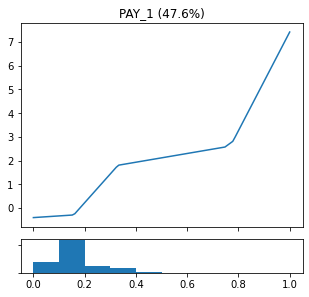

In [16]:
# show one specific effect
model.show_global_explain(key="PAY_1")

### Feature and effect importance

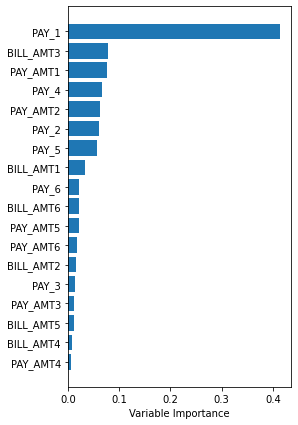

In [17]:
from matplotlib import pylab as plt
plt.figure(figsize=(4, 7))
plt.barh(np.arange(model.n_features_), np.sort(model.feature_importance_))
plt.yticks(np.arange(model.n_features_), np.array(model.feature_names_)[np.argsort(model.feature_importance_)])
plt.xlabel("Variable Importance")
plt.show()

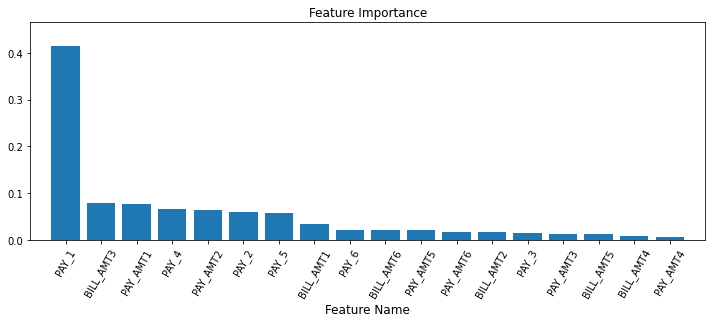

In [18]:
## feature importance 
model.show_feature_importance()

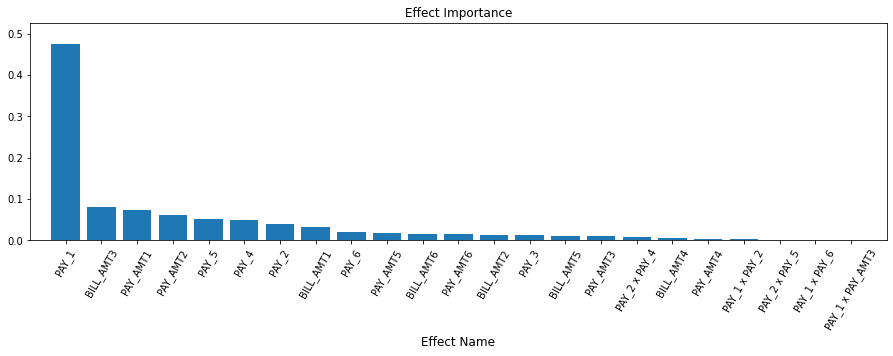

In [19]:
## effect importance 
model.show_effect_importance()

### Local Explain

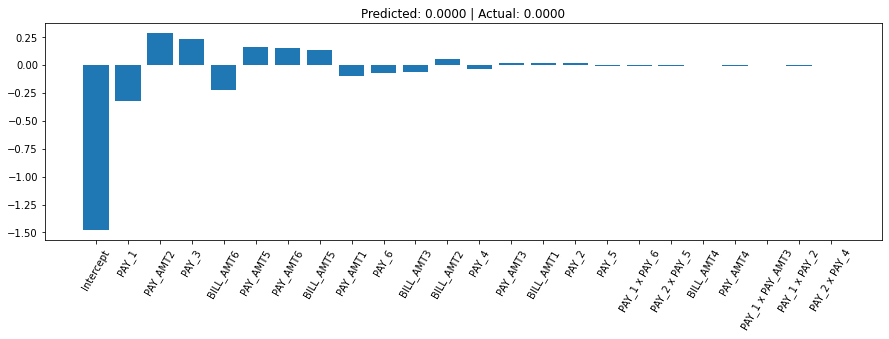

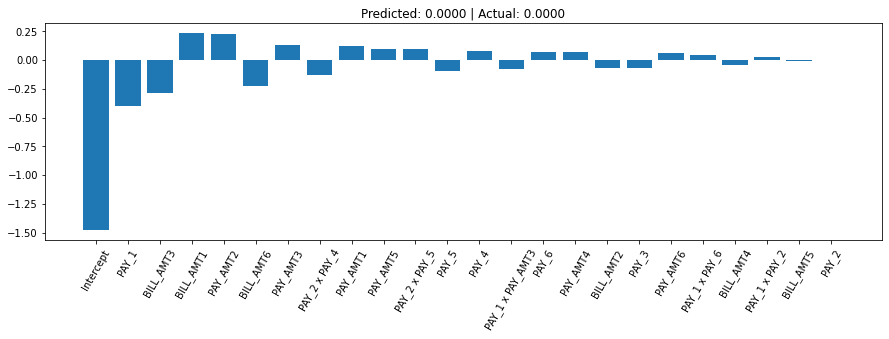

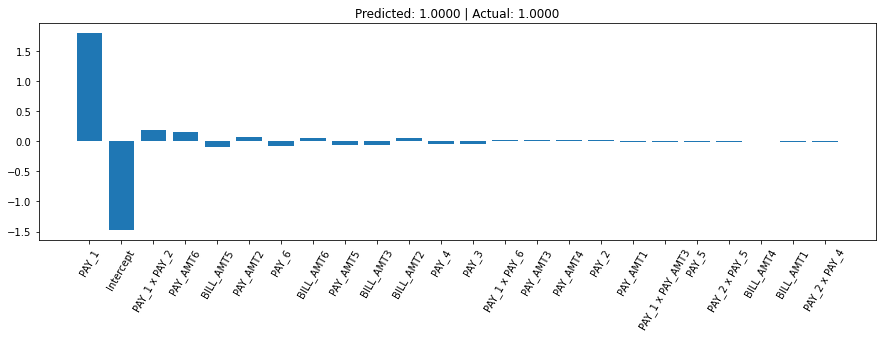

In [20]:
model.show_local_explain(train_x[:3], train_y[:3])

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###############Run Warm Initialization for Main Effect###############
####################Stage 1: Main Effect Training####################


Epoch:    1, train loss: 0.44755, validation loss: 0.44491: 100%|██████████| 20/20 [00:00<00:00, 56.62it/s]                        
Epoch:    2, train loss: 0.44380, validation loss: 0.44731: 100%|██████████| 20/20 [00:00<00:00, 76.98it/s]                        
Epoch:    3, train loss: 0.44297, validation loss: 0.44526: 100%|██████████| 20/20 [00:00<00:00, 75.69it/s]                        
Epoch:    4, train loss: 0.44139, validation loss: 0.44332: 100%|██████████| 20/20 [00:00<00:00, 73.17it/s]                        
Epoch:    5, train loss: 0.44039, validation loss: 0.44314: 100%|██████████| 20/20 [00:00<00:00, 74.83it/s]                        
Epoch:    6, train loss: 0.43982, validation loss: 0.44321: 100%|██████████| 20/20 [00:00<00:00, 76.32it/s]                        
Epoch:    7, train loss: 0.43979, validation loss: 0.44258: 100%|██████████| 20/20 [00:00<00:00, 75.16it/s]                        
Epoch:    8, train loss: 0.43933, validation loss: 0.44294: 100%|██████████|

Main Effect Training Stop at Epoch: 39, train loss: 0.43665, validation loss: 0.44113
###############Run Warm Initialization for Interaction###############
####################Stage 2: Interaction Training####################


Epoch:    1, train loss: 0.43537, validation loss: 0.43810: 100%|██████████| 20/20 [00:00<00:00, 24.63it/s]                        
Epoch:    2, train loss: 0.43497, validation loss: 0.43801: 100%|██████████| 20/20 [00:00<00:00, 28.59it/s]                        
Epoch:    3, train loss: 0.43376, validation loss: 0.43655: 100%|██████████| 20/20 [00:00<00:00, 28.98it/s]                        
Epoch:    4, train loss: 0.43312, validation loss: 0.43695: 100%|██████████| 20/20 [00:00<00:00, 28.70it/s]                        
Epoch:    5, train loss: 0.43306, validation loss: 0.43652: 100%|██████████| 20/20 [00:00<00:00, 28.85it/s]                        
Epoch:    6, train loss: 0.43268, validation loss: 0.43629: 100%|██████████| 20/20 [00:00<00:00, 28.81it/s]                        
Epoch:    7, train loss: 0.43257, validation loss: 0.43770: 100%|██████████| 20/20 [00:00<00:00, 28.55it/s]                        
Epoch:    8, train loss: 0.43286, validation loss: 0.43640: 100%|██████████|

Interaction Training Stop at Epoch: 41, train loss: 0.43304, validation loss: 0.43700
#########################Stage 3: Fine Tuning#########################


Epoch:    1, train loss: 0.43374, validation loss: 0.43682: 100%|██████████| 20/20 [00:00<00:00, 26.88it/s]                        
Epoch:    2, train loss: 0.43353, validation loss: 0.43689: 100%|██████████| 20/20 [00:00<00:00, 26.42it/s]                        
Epoch:    3, train loss: 0.43352, validation loss: 0.43688: 100%|██████████| 20/20 [00:00<00:00, 26.33it/s]                        
Epoch:    4, train loss: 0.43357, validation loss: 0.43690: 100%|██████████| 20/20 [00:00<00:00, 26.16it/s]                        
Epoch:    5, train loss: 0.43347, validation loss: 0.43693: 100%|██████████| 20/20 [00:00<00:00, 27.80it/s]                        
Epoch:    6, train loss: 0.43357, validation loss: 0.43700: 100%|██████████| 20/20 [00:00<00:00, 28.36it/s]                        
Epoch:    7, train loss: 0.43350, validation loss: 0.43692: 100%|██████████| 20/20 [00:00<00:00, 28.83it/s]                        
Epoch:    8, train loss: 0.43342, validation loss: 0.43680: 100%|██████████|

Fine Tuning Stop at Epoch: 19, train loss: 0.43343, validation loss: 0.43692


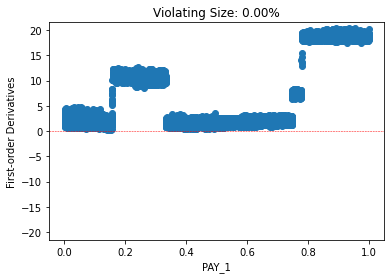

In [41]:
model = GAMINetClassifier(interact_num=10,
                          meta_info=meta_info,
                          subnet_size_main_effect=(20, ),
                          subnet_size_interaction=(20, 20), 
                          max_epochs=(1000, 1000, 1000),
                          learning_rates=(0.001, 0.001, 0.0001),
                          early_stop_thres=("auto", "auto", "auto"),
                          batch_size=1000,
                          warm_start=True,
                          reg_clarity=0.1,
                          reg_mono=0.5,
                          verbose=True,
                          mono_increasing_list=(0, ),
                          random_state=random_state)
model.fit(train_x, train_y)
model.partial_derivatives(0)

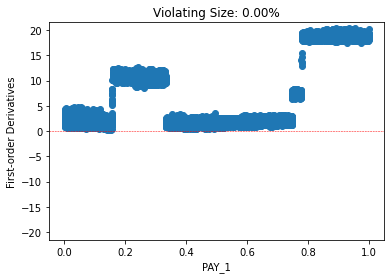

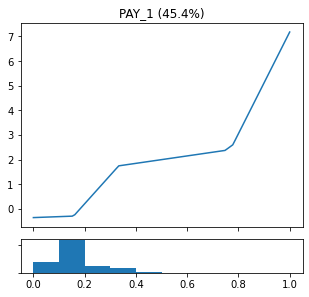

In [43]:
model.partial_derivatives(0)
model.show_global_explain(key="PAY_1")

In [44]:
model = GAMINetClassifier(interact_num=10,
                          meta_info=meta_info,
                          subnet_size_main_effect=(20, ),
                          subnet_size_interaction=(20, 20), 
                          max_epochs=(1000, 1000, 1000),
                          learning_rates=(0.001, 0.001, 0.0001),
                          early_stop_thres=("auto", "auto", "auto"),
                          batch_size=1000,
                          warm_start=True,
                          reg_clarity=0.1,
                          verbose=True,
                          random_state=random_state)
model.fit(train_x, train_y)

/root/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###############Run Warm Initialization for Main Effect###############
####################Stage 1: Main Effect Training####################


Epoch:    1, train loss: 0.44777, validation loss: 0.44500: 100%|██████████| 20/20 [00:00<00:00, 106.99it/s]                       
Epoch:    2, train loss: 0.44390, validation loss: 0.44731: 100%|██████████| 20/20 [00:00<00:00, 214.27it/s]                       
Epoch:    3, train loss: 0.44291, validation loss: 0.44515: 100%|██████████| 20/20 [00:00<00:00, 224.56it/s]                       
Epoch:    4, train loss: 0.44127, validation loss: 0.44316: 100%|██████████| 20/20 [00:00<00:00, 223.70it/s]                       
Epoch:    5, train loss: 0.44024, validation loss: 0.44293: 100%|██████████| 20/20 [00:00<00:00, 224.65it/s]                       
Epoch:    6, train loss: 0.43964, validation loss: 0.44296: 100%|██████████| 20/20 [00:00<00:00, 219.32it/s]                       
Epoch:    7, train loss: 0.43959, validation loss: 0.44235: 100%|██████████| 20/20 [00:00<00:00, 220.61it/s]                       
Epoch:    8, train loss: 0.43913, validation loss: 0.44270: 100%|██████████|

Main Effect Training Stop at Epoch: 39, train loss: 0.43619, validation loss: 0.44092
###############Run Warm Initialization for Interaction###############
####################Stage 2: Interaction Training####################


Epoch:    1, train loss: 0.43378, validation loss: 0.43738: 100%|██████████| 20/20 [00:00<00:00, 50.60it/s]                        
Epoch:    2, train loss: 0.43260, validation loss: 0.43745: 100%|██████████| 20/20 [00:00<00:00, 69.53it/s]                        
Epoch:    3, train loss: 0.43194, validation loss: 0.43664: 100%|██████████| 20/20 [00:00<00:00, 68.25it/s]                        
Epoch:    4, train loss: 0.43132, validation loss: 0.43672: 100%|██████████| 20/20 [00:00<00:00, 70.55it/s]                        
Epoch:    5, train loss: 0.43106, validation loss: 0.43641: 100%|██████████| 20/20 [00:00<00:00, 69.98it/s]                        
Epoch:    6, train loss: 0.43086, validation loss: 0.43650: 100%|██████████| 20/20 [00:00<00:00, 69.78it/s]                        
Epoch:    7, train loss: 0.43075, validation loss: 0.43782: 100%|██████████| 20/20 [00:00<00:00, 68.04it/s]                        
Epoch:    8, train loss: 0.43106, validation loss: 0.43606: 100%|██████████|

Interaction Training Stop at Epoch: 31, train loss: 0.42914, validation loss: 0.43609
#########################Stage 3: Fine Tuning#########################


Epoch:    1, train loss: 0.42949, validation loss: 0.43564: 100%|██████████| 20/20 [00:00<00:00, 67.45it/s]                        
Epoch:    2, train loss: 0.42952, validation loss: 0.43568: 100%|██████████| 20/20 [00:00<00:00, 65.75it/s]                        
Epoch:    3, train loss: 0.42918, validation loss: 0.43550: 100%|██████████| 20/20 [00:00<00:00, 67.33it/s]                        
Epoch:    4, train loss: 0.42914, validation loss: 0.43544: 100%|██████████| 20/20 [00:00<00:00, 65.23it/s]                        
Epoch:    5, train loss: 0.42918, validation loss: 0.43545: 100%|██████████| 20/20 [00:00<00:00, 66.60it/s]                        
Epoch:    6, train loss: 0.42913, validation loss: 0.43547: 100%|██████████| 20/20 [00:00<00:00, 65.69it/s]                        
Epoch:    7, train loss: 0.42913, validation loss: 0.43538: 100%|██████████| 20/20 [00:00<00:00, 67.41it/s]                        
Epoch:    8, train loss: 0.42904, validation loss: 0.43524: 100%|██████████|

Fine Tuning Stop at Epoch: 29, train loss: 0.42886, validation loss: 0.43523


GAMINetClassifier(batch_size=1000,
                  meta_info={'BILL_AMT1': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT2': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT3': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT4': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT5': {'scaler': MinMaxScaler(),
                                           'type': 'continuous'},
                             'BILL_AMT6': {'s...
                             'PAY_AMT1': {'scaler': MinMaxScaler(),
                                          'type': 'continuous'},
                             'PAY_AMT2': {'scaler': MinMaxScaler(),
                                        

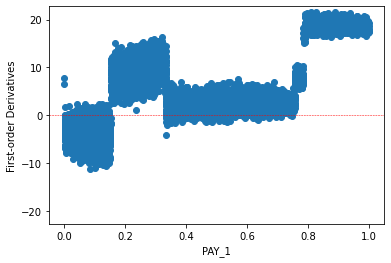

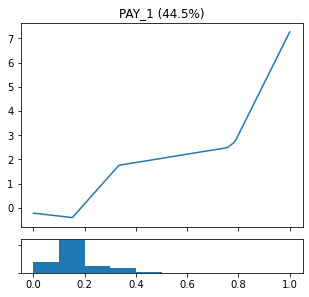

In [45]:
model.partial_derivatives(0)
model.show_global_explain(key="PAY_1")

In [46]:
pred_train = model.predict_proba(train_x)[:, 1]
pred_test = model.predict_proba(test_x)[:, 1]
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train.ravel()),5),
                          np.round(get_metric(test_y, pred_test.ravel()),5)])
print(gaminet_stat)

[0.77877 0.77135]
